---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [2]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
bike_data = pd.read_csv('sbikedata.csv')
bike_data.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) : ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : ㅇ 귀무가설: 온도 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 온도 여부와 따릉이 대여량 간에는 연관성이 있다.

- 가설 3 : ㅇ 귀무가설: 습도 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 습도 여부와 따릉이 대여량 간에는 연관성이 있다.

- 가설 4 : ㅇ 귀무가설: 오존수치 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 오존수치 여부와 따릉이 대여량 간에는 연관성이 있다.

- 가설 5 : ㅇ 귀무가설: 미세먼지 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 미세먼지 여부와 따릉이 대여량 간에는 연관성이 있다.

- 가설 6 : ㅇ 귀무가설: 시정 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 시정 여부와 따릉이 대여량 간에는 연관성이 있다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요? 0시부터 23시 1시간 단위, 따릉이를 이용하는 시간대

2. 변수가 수치형인지 범주형인지


In [3]:
#변수의 자료형을 확인해보세요.
bike_data['hour'].dtype

dtype('int64')

범주

3. 변수의 결측치 존재 여부 및 조치방안

In [4]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [5]:
bike_data['hour'].isna().sum()

0

bike_data.info()

4. 변수의 기초 통계량 확인

In [6]:
#변수의 기초 통계량을 확인해보세요.
bike_data['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

In [7]:
#변수의 분포를 확인해보세요.
bike_data['hour'].value_counts()

1     243
14    243
23    243
22    243
21    243
20    243
19    243
18    243
17    243
16    243
15    243
13    243
12    243
11    243
10    243
9     243
8     243
7     243
5     243
0     243
2     242
6     242
3     242
4     241
Name: hour, dtype: int64

6. 위 정보로 부터 파악한 내용 정리

In [5]:
#위 정보로부터 파악하신 내용을 정리해보세요.


7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

온도, 

2. 변수가 수치형인지 범주형인지


In [8]:
#변수의 자료형을 확인해보세요.
bike_data['temperature'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [9]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
bike_data['temperature'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [10]:
#변수의 기초 통계량을 확인해보세요
bike_data['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인

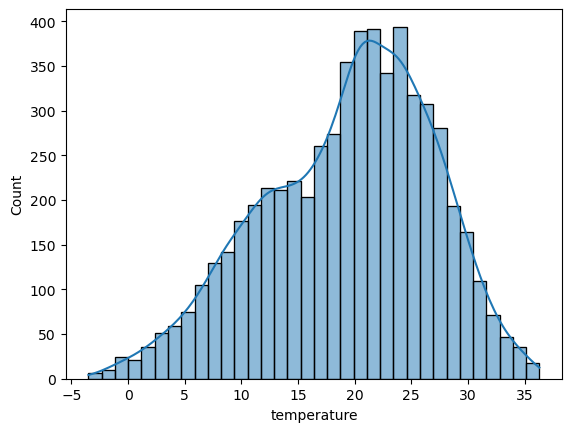

In [12]:
#변수의 분포를 확인해보세요.
sns.histplot(x='temperature', data=bike_data, kde=True)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

강우여부

2. 변수가 수치형인지 범주형인지


In [13]:
#변수의 자료형을 확인해보세요.
bike_data['precipitation'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [14]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
bike_data['precipitation'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [15]:
#변수의 기초 통계량을 확인해보세요
bike_data['precipitation'].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

In [16]:
#변수의 분포를 확인해보세요.
bike_data['precipitation'].value_counts()

0    5387
1     440
Name: precipitation, dtype: int64

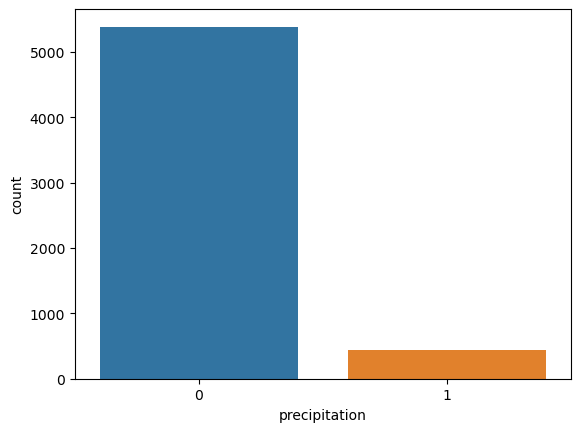

In [18]:
sns.countplot(x='precipitation', data=bike_data)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

풍속

2. 변수가 수치형인지 범주형인지


In [19]:
#변수의 자료형을 확인해보세요.
bike_data['windspeed'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [20]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
bike_data['windspeed'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [21]:
#변수의 기초 통계량을 확인해보세요
bike_data['windspeed'].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

<Axes: xlabel='windspeed', ylabel='Count'>

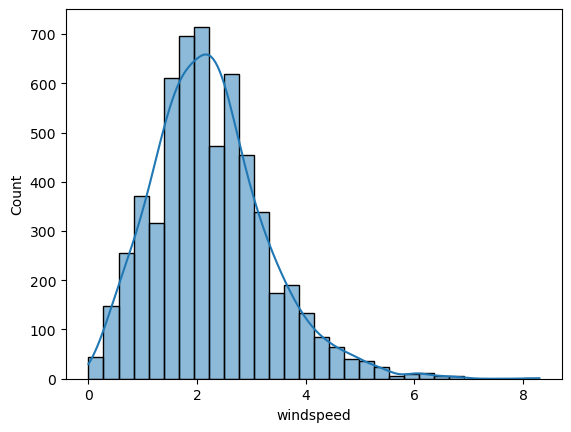

In [23]:
#변수의 분포를 확인해보세요.
sns.histplot(x='windspeed', data=bike_data, kde=True, bins=30)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

습도

2. 변수가 수치형인지 범주형인지


In [24]:
#변수의 자료형을 확인해보세요.
bike_data['humidity'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [25]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
bike_data['humidity'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [26]:
#변수의 기초 통계량을 확인해보세요
bike_data['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

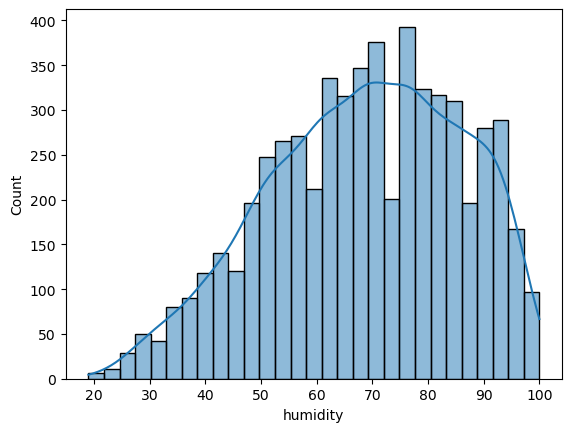

In [27]:
#변수의 분포를 확인해보세요.
sns.histplot(x='humidity', data=bike_data, kde=True)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

가시거리

2. 변수가 수치형인지 범주형인지


In [28]:
#변수의 자료형을 확인해보세요.
bike_data['visibility'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [29]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
bike_data['visibility'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [30]:
#변수의 기초 통계량을 확인해보세요
bike_data['visibility'].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

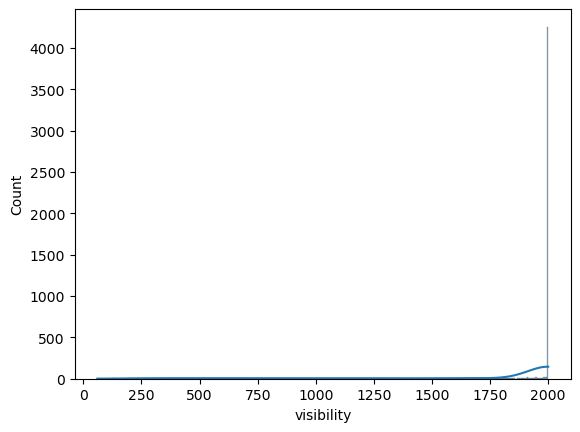

In [31]:
#변수의 분포를 확인해보세요.
sns.histplot(x='visibility', data=bike_data, kde=True)
plt.show()

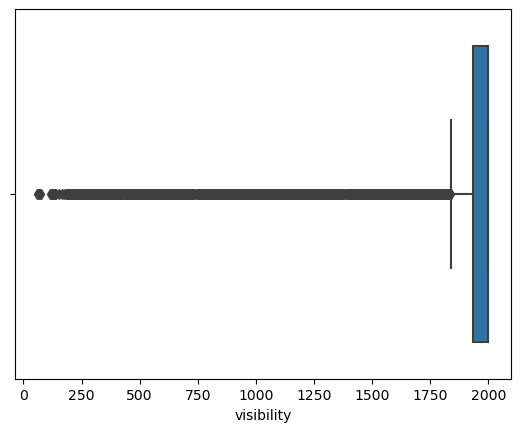

In [32]:
sns.boxplot(x='visibility', data=bike_data)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

오존수치

2. 변수가 수치형인지 범주형인지


In [33]:
#변수의 자료형을 확인해보세요.
bike_data['ozone'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [34]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
bike_data['ozone'].isna().sum()

128

선형보간법으로 결측치를 처리한다.

In [40]:
bike_data.loc[bike_data['ozone'].isna()]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,NaN,NaN,NaN,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,NaN,17.6,0,3.9,39,2000,73
538,2021-04-23,11,NaN,NaN,NaN,20.5,0,4.4,42,2000,261
539,2021-04-23,12,NaN,NaN,NaN,20.6,0,4.4,32,2000,258
540,2021-04-23,13,NaN,NaN,NaN,20.6,0,4.0,33,2000,236
...,...,...,...,...,...,...,...,...,...,...,...
5648,2021-11-22,14,22.0,7.0,NaN,3.0,0,6.2,63,2000,143
5649,2021-11-22,15,16.0,NaN,NaN,3.0,0,6.1,56,2000,157
5650,2021-11-22,16,49.0,23.0,NaN,3.2,0,6.1,52,2000,155
5651,2021-11-22,17,43.0,19.0,NaN,2.1,0,4.6,56,2000,277


In [41]:
bike_data['ozone'].interpolate(method='linear', inplace=True)

In [43]:
bike_data['ozone'] = round(bike_data['ozone'],4)

In [44]:
bike_data[273:278]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
273,2021-04-12,10,38.0,24.0,0.0360,16.1,0,2.0,46,2000,93
274,2021-04-12,11,NaN,NaN,0.0367,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,0.0373,17.6,0,3.9,39,2000,73
276,2021-04-12,13,NaN,NaN,0.0380,16.6,0,3.8,48,1974,10
277,2021-04-12,14,24.0,20.0,0.0360,14.3,1,4.8,58,1380,6


In [45]:
bike_data['ozone'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [46]:
#변수의 기초 통계량을 확인해보세요
bike_data['ozone'].describe()

count    5827.000000
mean        0.031634
std         0.018263
min         0.001000
25%         0.019000
50%         0.030000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

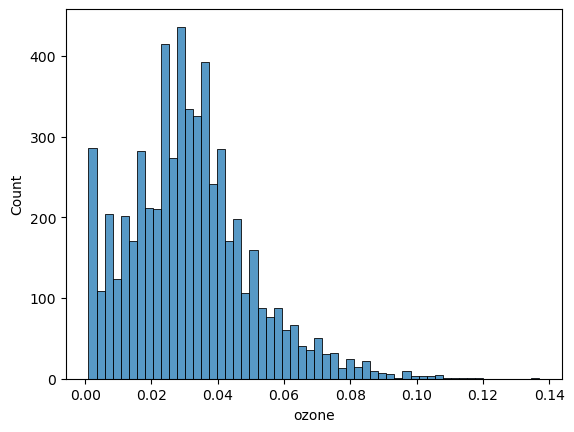

In [47]:
#변수의 분포를 확인해보세요.
sns.histplot(x='ozone', data=bike_data)
plt.show()

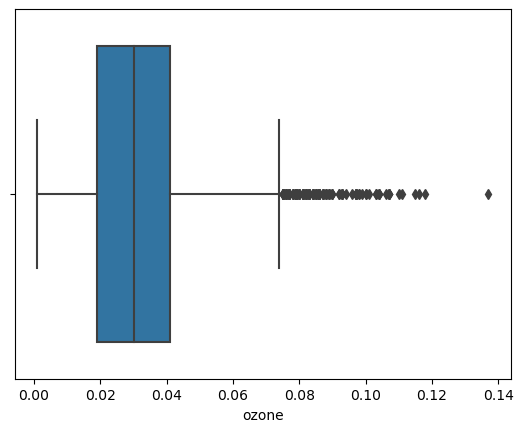

In [48]:
sns.boxplot(x='ozone', data=bike_data)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

미세먼지

2. 변수가 수치형인지 범주형인지


In [49]:
#변수의 자료형을 확인해보세요.
bike_data['PM10'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [50]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
bike_data['PM10'].isna().sum()

102

In [51]:
bike_data.loc[bike_data['PM10'].isna()]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,NaN,NaN,0.0367,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,0.0373,17.6,0,3.9,39,2000,73
276,2021-04-12,13,NaN,NaN,0.0380,16.6,0,3.8,48,1974,10
538,2021-04-23,11,NaN,NaN,0.0392,20.5,0,4.4,42,2000,261
539,2021-04-23,12,NaN,NaN,0.0395,20.6,0,4.4,32,2000,258
...,...,...,...,...,...,...,...,...,...,...,...
5147,2021-11-01,17,NaN,NaN,0.0368,14.8,0,2.6,61,2000,525
5503,2021-11-16,13,NaN,NaN,0.0296,12.5,0,2.6,36,2000,227
5504,2021-11-16,14,NaN,NaN,0.0302,13.3,0,2.9,35,2000,178
5505,2021-11-16,15,NaN,NaN,0.0308,13.3,0,3.3,37,2000,233


In [52]:
bike_data['PM10'].interpolate(method='linear', inplace=True)
bike_data[273:278]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
273,2021-04-12,10,38.0,24.0,0.0360,16.1,0,2.0,46,2000,93
274,2021-04-12,11,34.5,NaN,0.0367,16.9,0,2.8,41,2000,117
275,2021-04-12,12,31.0,NaN,0.0373,17.6,0,3.9,39,2000,73
276,2021-04-12,13,27.5,NaN,0.0380,16.6,0,3.8,48,1974,10
277,2021-04-12,14,24.0,20.0,0.0360,14.3,1,4.8,58,1380,6


In [53]:
bike_data['PM10'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [54]:
#변수의 기초 통계량을 확인해보세요
bike_data['PM10'].describe()

count    5827.000000
mean       31.833705
std        42.650908
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

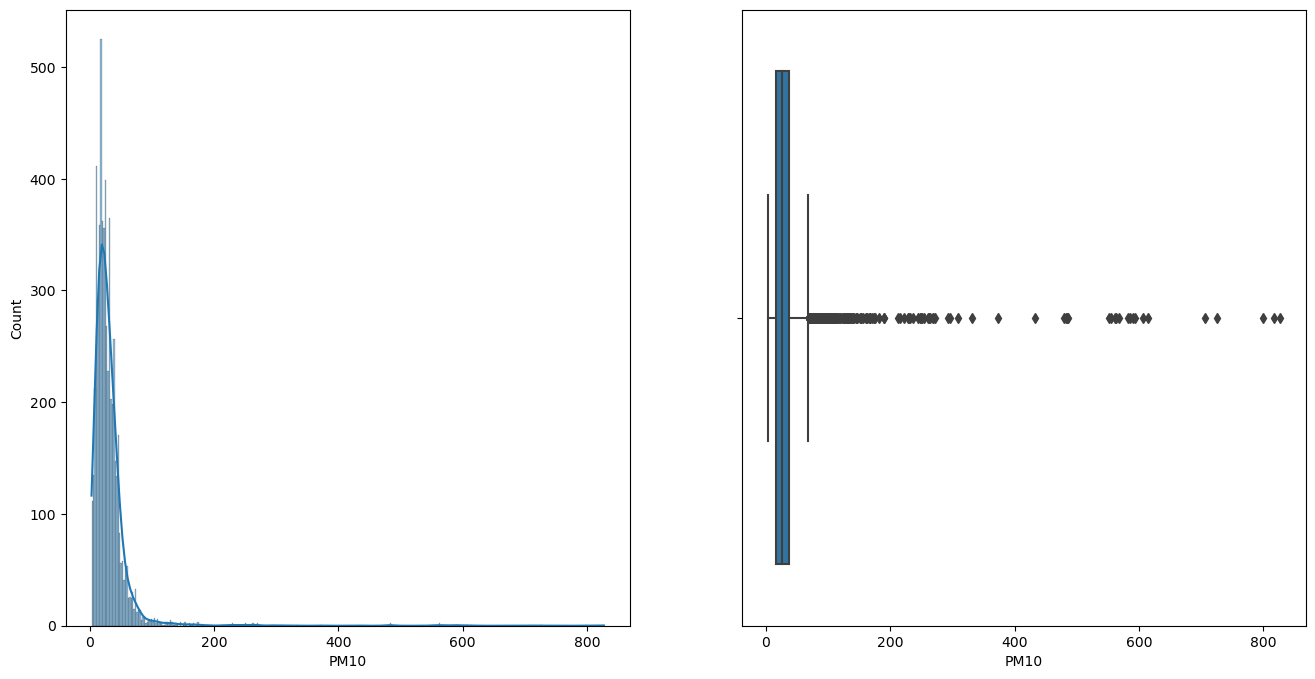

In [57]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.histplot(x='PM10', data=bike_data, kde=True)

plt.subplot(1,2,2)
sns.boxplot(x='PM10', data=bike_data)

plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

초 미세먼지

2. 변수가 수치형인지 범주형인지


In [58]:
#변수의 자료형을 확인해보세요.
bike_data['PM2.5'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [59]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
bike_data['PM2.5'].isna().sum()

95

In [60]:
bike_data.loc[bike_data['PM2.5'].isna()]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,34.50,NaN,0.0367,16.9,0,2.8,41,2000,117
275,2021-04-12,12,31.00,NaN,0.0373,17.6,0,3.9,39,2000,73
276,2021-04-12,13,27.50,NaN,0.0380,16.6,0,3.8,48,1974,10
538,2021-04-23,11,39.25,NaN,0.0392,20.5,0,4.4,42,2000,261
539,2021-04-23,12,34.50,NaN,0.0395,20.6,0,4.4,32,2000,258
...,...,...,...,...,...,...,...,...,...,...,...
5504,2021-11-16,14,43.40,NaN,0.0302,13.3,0,2.9,35,2000,178
5505,2021-11-16,15,43.60,NaN,0.0308,13.3,0,3.3,37,2000,233
5506,2021-11-16,16,43.80,NaN,0.0314,13.0,0,3.0,41,2000,302
5649,2021-11-22,15,16.00,NaN,0.0186,3.0,0,6.1,56,2000,157


In [61]:
bike_data['PM2.5'].interpolate(method='linear', inplace=True)
bike_data[273:278]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
273,2021-04-12,10,38.0,24.0,0.0360,16.1,0,2.0,46,2000,93
274,2021-04-12,11,34.5,23.0,0.0367,16.9,0,2.8,41,2000,117
275,2021-04-12,12,31.0,22.0,0.0373,17.6,0,3.9,39,2000,73
276,2021-04-12,13,27.5,21.0,0.0380,16.6,0,3.8,48,1974,10
277,2021-04-12,14,24.0,20.0,0.0360,14.3,1,4.8,58,1380,6


In [62]:
bike_data['PM2.5'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [63]:
#변수의 기초 통계량을 확인해보세요
bike_data['PM2.5'].describe()

count    5827.000000
mean       15.633774
std        13.791083
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

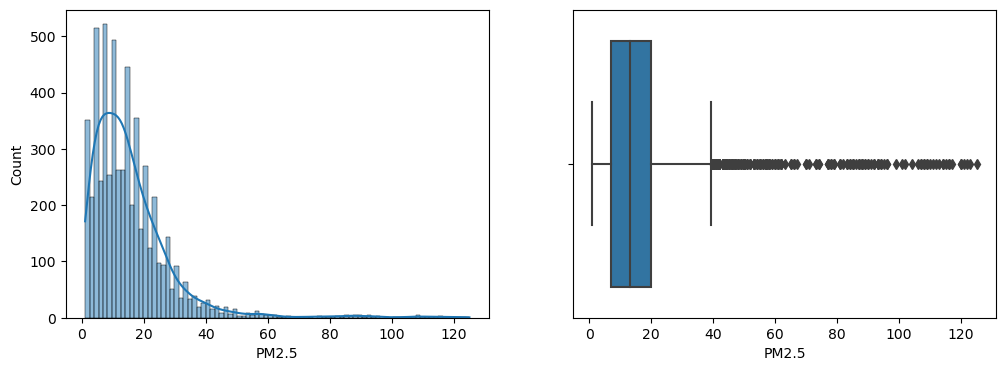

In [65]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(x='PM2.5', data=bike_data, kde=True)

plt.subplot(1,2,2)
sns.boxplot(x='PM2.5', data=bike_data)

plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

대여량

2. 변수가 수치형인지 범주형인지


In [66]:
#변수의 자료형을 확인해보세요.
bike_data['count'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [67]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
bike_data['count'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [68]:
#변수의 기초 통계량을 확인해보세요
bike_data['count'].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

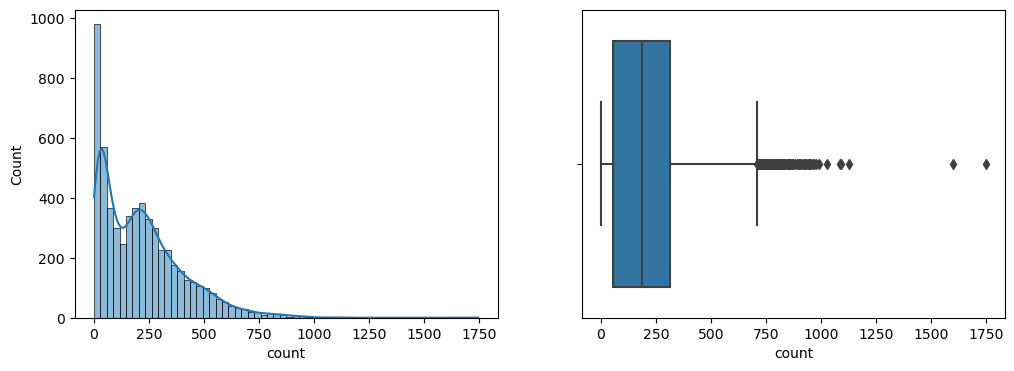

In [70]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(x='count', data=bike_data, kde=True)

plt.subplot(1,2,2)
sns.boxplot(x='count', data=bike_data)

plt.show()

In [79]:
bike_data.loc[bike_data['count']<50, 'count'].count()

1407

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

In [82]:
import scipy.stats as spst  

In [80]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5827 non-null   float64
 3   PM2.5          5827 non-null   float64
 4   ozone          5827 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


1. 강수 여부와 따릉이 대여량간 이변량 분석

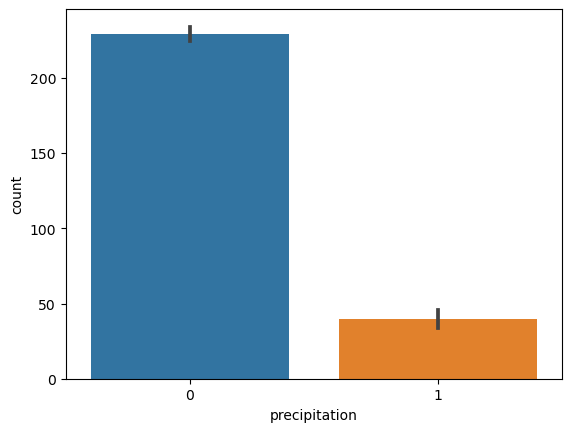

In [81]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
target = 'count'
sns.barplot(x='precipitation', y=target, data=bike_data)
plt.show()

In [83]:
pre0 = bike_data.loc[bike_data['precipitation']==0, 'count']
pre1 = bike_data.loc[bike_data['precipitation']==1, 'count']

In [84]:
spst.ttest_ind(pre0, pre1)

Ttest_indResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98)

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [85]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
bike_data.groupby('hour', as_index=False)['count'].mean()

,hour,count
0,0,92.074074
1,1,56.864198
2,2,35.380165
3,3,23.661157
4,4,17.448133
5,5,28.226337
6,6,67.425620
7,7,137.703704
8,8,253.222222
9,9,186.242798


In [86]:
df = bike_data.groupby('hour', as_index=False)['count'].mean()

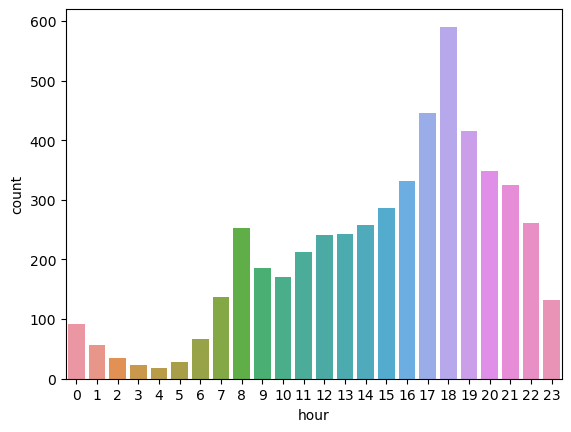

In [87]:
sns.barplot(x='hour', y='count',data=df)
plt.show()

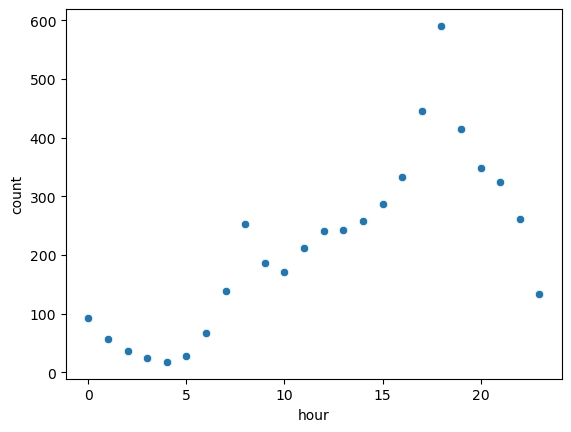

In [88]:
sns.scatterplot(x='hour', y='count',data=df)
plt.show()

In [89]:
spst.pearsonr(df['hour'], df['count'])

PearsonRResult(statistic=0.7485642292809059, pvalue=2.585206957245293e-05)

3. 온도 데이터와 따릉이 대여량간 분석

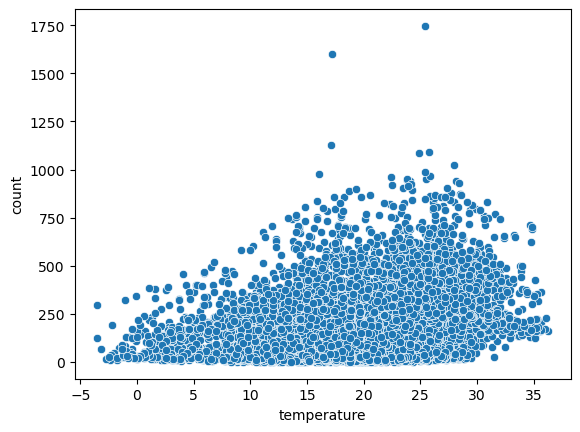

In [90]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.scatterplot(x='temperature', y='count', data=bike_data)
plt.show()

In [91]:
spst.pearsonr(bike_data['temperature'], bike_data['count'])

PearsonRResult(statistic=0.2771692363089791, pvalue=2.940516555113978e-103)

4. 풍속 데이터와 따릉이 대여량간 분석

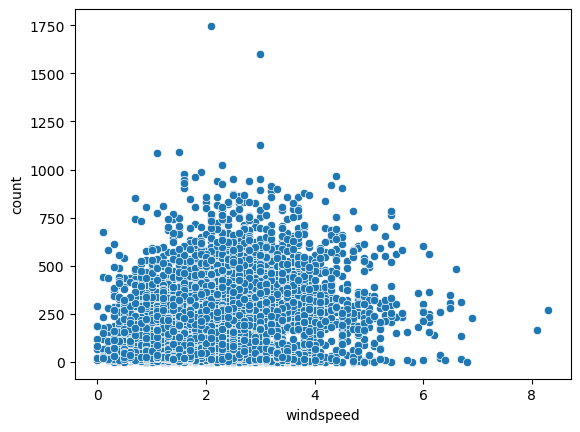

In [92]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.scatterplot(x='windspeed', y='count', data=bike_data)
plt.show()

In [93]:
spst.pearsonr(bike_data['windspeed'], bike_data['count'])

PearsonRResult(statistic=0.22372189900674888, pvalue=5.243317678213925e-67)

5. 습도 데이터와 따릉이 대여량간 분석

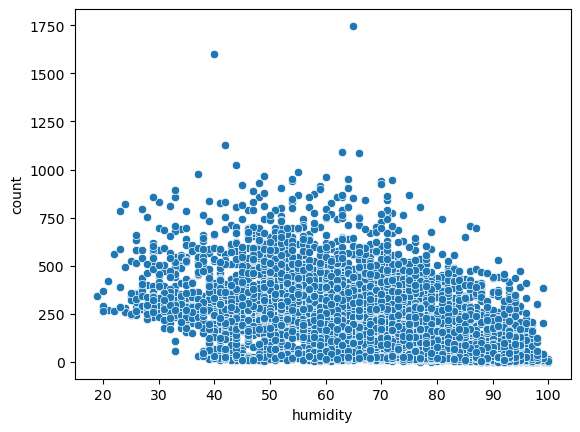

In [94]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.scatterplot(x='humidity', y='count', data=bike_data)
plt.show()

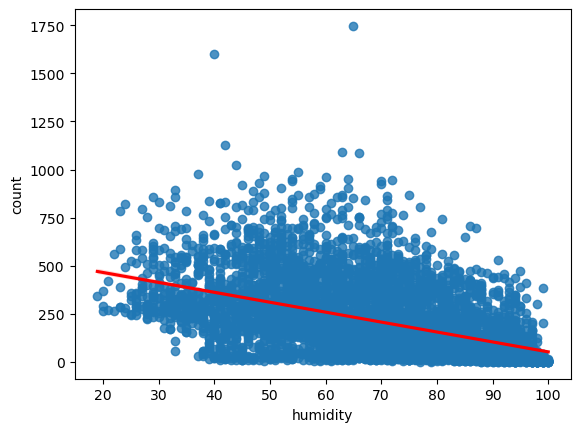

In [100]:
sns.regplot(x='humidity', y='count', data=bike_data, line_kws={'color':'red'})
plt.show()

In [95]:
spst.pearsonr(bike_data['humidity'], bike_data['count'])

PearsonRResult(statistic=-0.4789554265904137, pvalue=0.0)

6. 시정 데이터와 따릉이 대여량간 분석

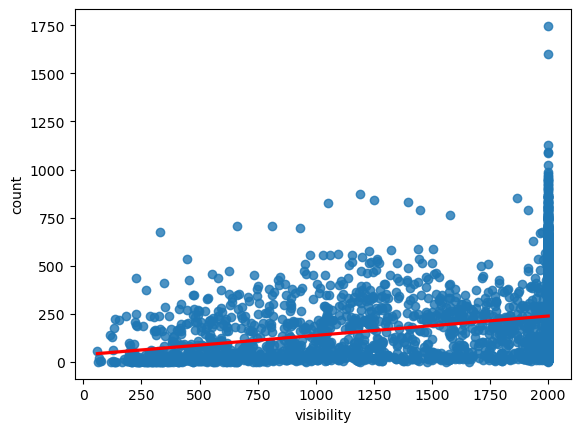

In [101]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x='visibility', y='count', data=bike_data, line_kws={'color':'red'})
plt.show()

In [102]:
spst.pearsonr(bike_data['visibility'], bike_data['count'])

PearsonRResult(statistic=0.26582778327488765, pvalue=7.87600385276935e-95)

7. 오존 데이터와 따릉이 대여량간 분석

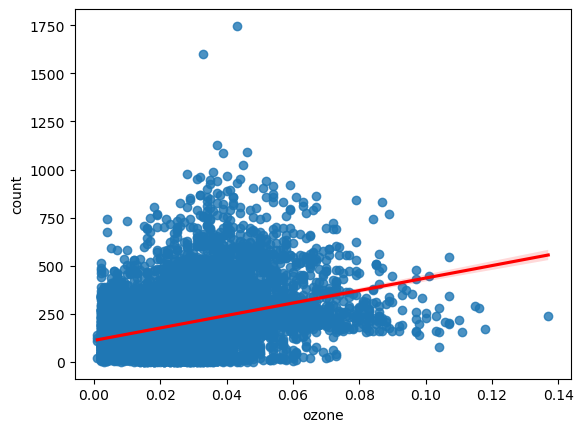

In [103]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x='ozone', y='count', data=bike_data, line_kws={'color':'red'})
plt.show()

In [104]:
spst.pearsonr(bike_data['ozone'], bike_data[target])

PearsonRResult(statistic=0.3179945777185908, pvalue=4.695372022721349e-137)

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

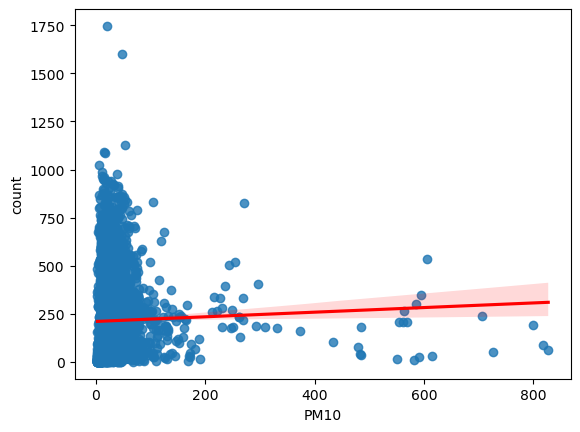

In [105]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x='PM10', y='count', data=bike_data, line_kws={'color':'red'})
plt.show()

In [106]:
spst.pearsonr(bike_data['PM10'],bike_data[target])

PearsonRResult(statistic=0.02753552779908241, pvalue=0.035564992622628286)

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

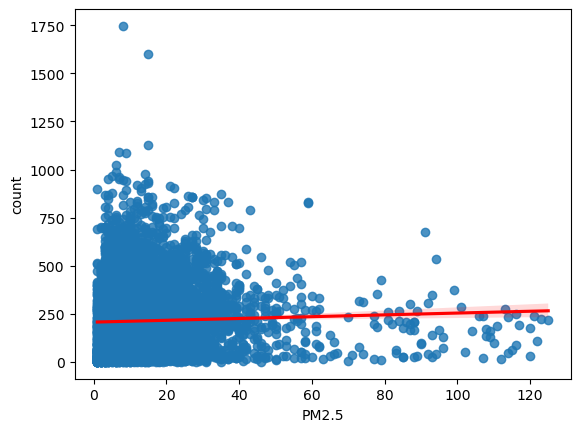

In [107]:
#데이터 타입에 주의하여 이변량 분석을 해보세요#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x='PM2.5', y='count', data=bike_data, line_kws={'color':'red'})
plt.show()

In [109]:
spst.pearsonr(bike_data['PM2.5'], bike_data['count'])

PearsonRResult(statistic=0.034833977797175945, pvalue=0.007830765224447778)

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

강수여부, 시간, 습도, 오존 수치

#### <font color='green'>2. 약한 관계의 변수</font>


가시거리, 온도, 풍속

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


미세먼지, 초미세먼지

### [Step6] Insight 도출

강수여부에 따라 대여량이 차이가 있다.
시간대에 따라 대여량이 다르다.
대여량이 습도에 영향을 받는다.